# Dissertation Analysis 

Clustering the UK based on IMD, AHAH, GVA, GDP per LSOA

## Import packages and load data

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import re
import os
from shapely.geometry import Point
from geopandas import datasets, GeoDataFrame, read_file
from geopandas.tools import overlay
import datetime
import pysal as ps
from pysal.contrib.viz import mapping as maps
import mapclassify.classifiers as classifiers


import sklearn
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from esda.adbscan import ADBSCAN
from sklearn.metrics import r2_score

from matplotlib.colors import ListedColormap
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.pyplot as plt



import random
random.seed(42)    # For reproducibility
np.random.seed(42) # For reproducibility

# Make numeric display a bit neater
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

#visualisation set
sns.set(style="whitegrid", palette="pastel", color_codes=True) 
sns.mpl.rc("figure", figsize=(10,6))

from IPython.display import HTML


C:\Users\Yasmine Hujair\anaconda32020\envs\Dissertation\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysalnext` package. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)
C:\Users\Yasmine Hujair\anaconda32020\envs\Dissertation\lib\site-packages\pysal\contrib\viz\mapping.py:32: UserWarning: Bokeh not installed. Functionality related to it will not work
  warn('Bokeh not installed. Functionality '


In [2]:
#Index of Multiple Deprivation 2015
# Set download URL
url = 'https://raw.githubusercontent.com/YHuj20/Buildbackbetter/main/Data/IMD2019.csv'
# Read in data from github
IMD19 = pd.read_csv(url, low_memory=False)

In [3]:
#Index of Multiple Deprivation 2015
# Set download URL
url = 'https://raw.githubusercontent.com/YHuj20/Buildbackbetter/main/Data/IMD2015.csv'
# Read in data from github
IMD15 = pd.read_csv(url, low_memory=False)

In [4]:
#Gross Value Added 
# Set download URL
url = 'https://raw.githubusercontent.com/YHuj20/Buildbackbetter/main/Data/GVA-per-head.csv'
# Read in data from github
GVAph = pd.read_csv(url, low_memory=False)

In [5]:
#Gross Domestic Product
# Set download URL
url = 'https://raw.githubusercontent.com/YHuj20/Buildbackbetter/main/Data/GDP.csv'
# Read in data from github
GDP = pd.read_csv(url, low_memory=False)

In [6]:
#Access to Healthy Assets and Hazards (AHAH)
# Set download URL
url = 'https://raw.githubusercontent.com/YHuj20/Buildbackbetter/main/Data/AHAH.csv'
# Read in data from github
AHAH = pd.read_csv(url, low_memory=False)

epsg:27700


<AxesSubplot:>

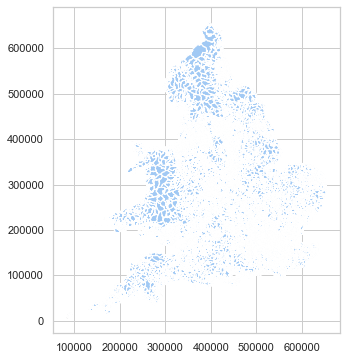

In [7]:
#Read in LSOA boundaries shapefile (local) downloadable from https://geoportal.statistics.gov.uk/datasets/lower-layer-super-output-areas-december-2011-boundaries-full-clipped-bfc-ew-v3?geometry=-23.080%2C50.522%2C18.734%2C55.161
lsoas = gpd.read_file(os.path.join('Buildbackbetter','Data','LSOA-boundaries','Lower_Layer_Super_Output_Areas__December_2011__Boundaries_Full_Clipped__BFC__EW_V3.shp'))
#checking projection
print(lsoas.crs)
lsoas.plot()